In [1]:
import os

base_dir = ('/home/cialyni/Рабочий стол/spbu_programming_4_sem/src/KNN') 
os.chdir(base_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from processing import MinMaxScaler, MaxAbsScaler, Metrics, train_test_split
from classifier import KNNClassifier

In [2]:
from sklearn.metrics import accuracy_score, f1_score

In [3]:
cancer_df = pd.read_csv('datas/cancer.csv')
cancer = cancer_df.sample(frac=1).reset_index(drop=True)
cancer_df


,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X = cancer_df.drop('label', axis=1).values 
y = cancer_df['label'].map({'B': 0, 'M': 1})

X_train, y_train, X_test, y_test = train_test_split(
    X, y,
    test_size=0.2,           
    random_state=None,         
    shuffle=True             
)


In [5]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'No Scaling': None  }

k_values = range(1, 16)
results = {}

In [6]:
print("Распределение классов в y_train:")
print(pd.Series(y_train).value_counts())
print("\nРаспределение классов в y_test:")
print(pd.Series(y_test).value_counts())

Распределение классов в y_train:
label
0    290
1    165
Name: count, dtype: int64

Распределение классов в y_test:
label
0    67
1    47
Name: count, dtype: int64


In [7]:
for scaler_name, scaler in scalers.items():
    if scaler:
        X_train_processed = scaler.fit_transform(X_train)
        X_test_processed = scaler.transform(X_test)
    else:
        X_train_processed = X_train.copy()
        X_test_processed = X_test.copy()
    
    accuracies = []
    f1_scores = []
    
    for k in k_values:
        knn = KNNClassifier(k=k, leaf_size=20)
        knn.fit(X_train_processed, y_train)

        y_pred = knn.predict(X_test_processed)

        #accuracy = Metrics.accuracy(y_pred, y_test)
        #f1 = Metrics.f1_score(y_pred, y_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        accuracies.append(accuracy)
        f1_scores.append(f1)

    results[scaler_name] = {
        'accuracies': accuracies,
        'f1_scores': f1_scores,
    }

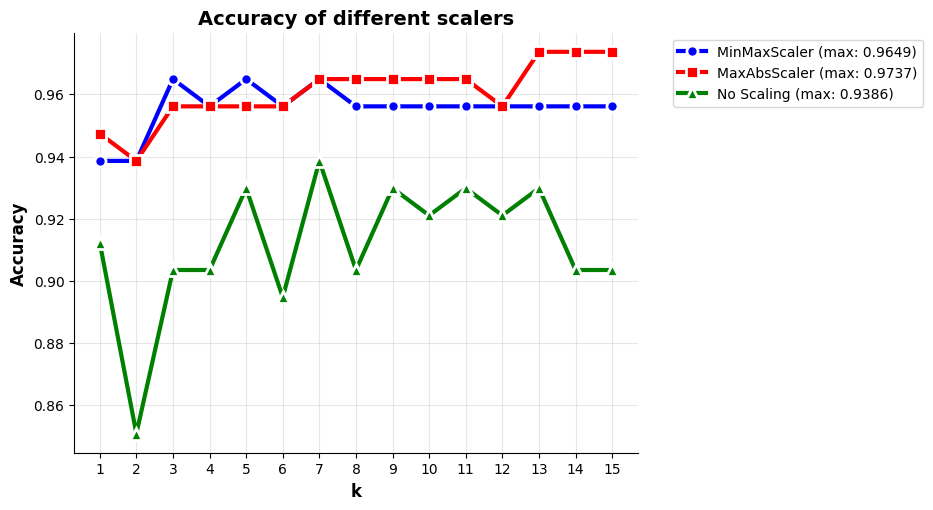

In [ ]:
plt.figure(figsize=(16, 12))  
plt.subplot(2, 2, 1)
colors = ['blue', 'red', 'green']  
markers = ['o', 's', '^']  
for i, (scaler_name, result) in enumerate(results.items()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(k_values, result['accuracies'], 
             marker=marker, 
             color=color, 
             linewidth=3, 
             markersize=8, 
             markeredgewidth=2,
             markeredgecolor='white',
             label=f'{scaler_name} (max: {max(result["accuracies"]):.4f})')

plt.xlabel('k', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy of different scalers', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True, alpha=0.3)
plt.xticks(k_values) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

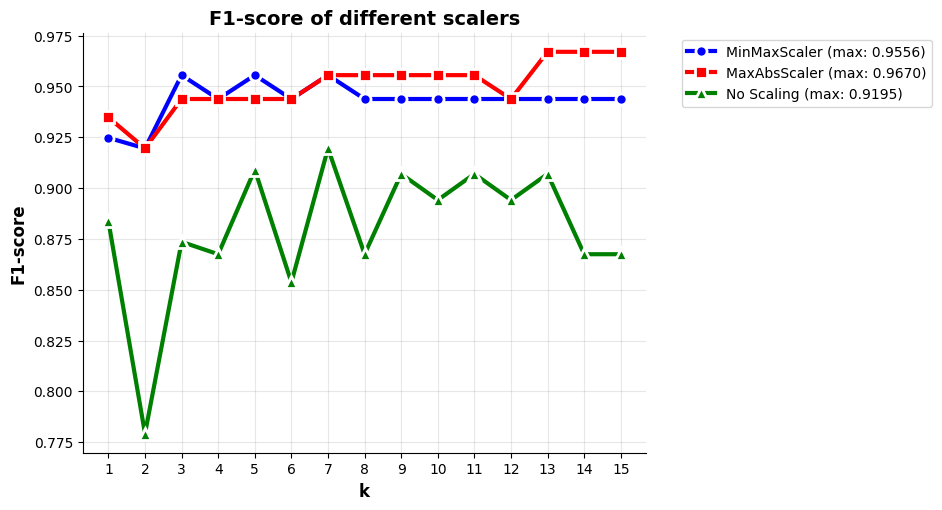

In [9]:
plt.figure(figsize=(16, 12))  
plt.subplot(2, 2, 2)
for i, (scaler_name, result) in enumerate(results.items()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(k_values, result['f1_scores'], 
             marker=marker, 
             color=color, 
             linewidth=3, 
             markersize=8, 
             markeredgewidth=2,
             markeredgecolor='white',
             label=f'{scaler_name} (max: {max(result["f1_scores"]):.4f})')

plt.xlabel('k', fontsize=12, fontweight='bold')
plt.ylabel('F1-score', fontsize=12, fontweight='bold')
plt.title('F1-score of different scalers', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)